# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [39]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [34]:
# show the first review
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [46]:
# convert the list of dictionaries to a DataFrame

listOfDictionaries = pd.DataFrame(data)

listOfDictionaries.head()


,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [48]:
# add DataFrame columns for cool, useful, and funny
#index = []
#for i in range(0,len(data)):
#    index.append(i)

#data[0]['votes']
    
#voteDict = pd.DataFrame(data[0:]['votes'], index=index)
#voteDict = pd.DataFrame.from_dict(data[0]['votes'], orient='columns')

#voteDict.head()

listOfDictionaries['cool'] = [row['cool'] for row in listOfDictionaries['votes']]
listOfDictionaries['useful'] = [row['useful'] for row in listOfDictionaries['votes']]
listOfDictionaries['funny'] = [row['funny'] for row in listOfDictionaries['votes']]

# why can't I do this then?
#listOfDictionaries['toocool'] = listOfDictionaries['votes']['cool']

In [49]:
# drop the votes column and then display the head
listOfDictionaries.drop('votes', axis= 1, inplace=True)
listOfDictionaries.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [2]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups

yelp.groupby(['stars'])['funny','useful','cool'].mean()


,funny,useful,cool
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


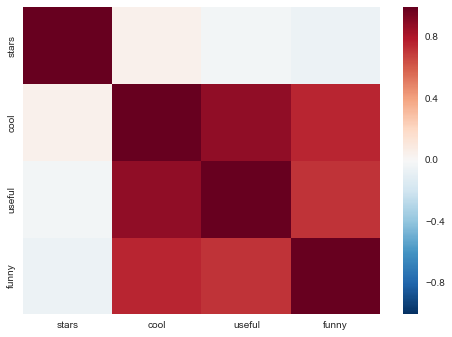

In [3]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

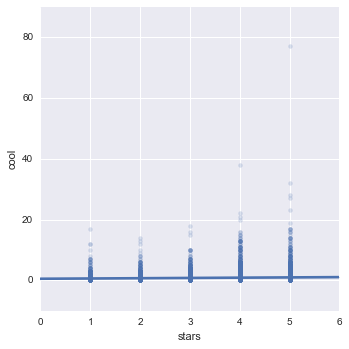

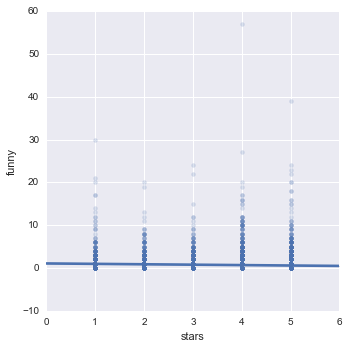

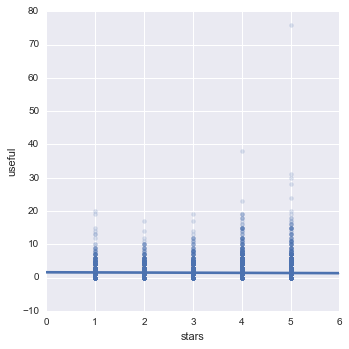

In [4]:
# display multiple scatter plots (cool, useful, funny) with linear regression line

sns.lmplot(x='stars', y='cool', data=yelp, scatter_kws={'alpha':0.2})
sns.lmplot(x='stars', y='funny', data=yelp, scatter_kws={'alpha':0.2})
sns.lmplot(x='stars', y='useful', data=yelp, scatter_kws={'alpha':0.2})


## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [5]:
X = yelp[['cool','useful','funny']]
y = yelp['stars']

#print X[0:4]
#print y[0:4]

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X,y)

print linreg.intercept_
print linreg.coef_

#the cool useful and funny votes are barely postively, slightly negatively, and slightly negatively correlated with
#the review's stars respectively. This makes sense since people are voting on the quality of the review and not the quality of what
# is being reviewed (the star rating).

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [8]:
# define a function that accepts a list of features and returns testing RMSE
#def train_test_rmse(feature_cols):
#    X = bikes[feature_cols]
#   y = bikes.total
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
#    linreg = LinearRegression()
#    linreg.fit(X_train, y_train)
#    y_pred = linreg.predict(X_test)
#    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

def train_test_rmse(features):
    X = yelp[features]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [9]:
# calculate RMSE with all three features
train_test_rmse(['cool','useful','funny'])

1.184290528216591

## Task 6

Try removing some of the features and see if the RMSE improves.

In [10]:
print "cool','useful", train_test_rmse(['cool','useful'])
print "cool','funny", train_test_rmse(['cool','funny'])
print "useful','funny ", train_test_rmse(['useful','funny'])

print "funny ", train_test_rmse(['funny'])
print "useful ", train_test_rmse(['useful'])
print "cool ", train_test_rmse(['cool'])


cool','useful 1.19623908761
cool','funny 1.19426732565
useful','funny  1.20982720239
funny  1.21023116293
useful  1.21191891478
cool  1.21055195341


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [11]:
# new feature: 
yelp['TextLength'] = yelp.text.str.len()


#how do I count every business id, 
#store result in a a new dataframe (business_id, count) 
#then add a row back to the yelp dataframe anytime the business id matches
#businessIdCount = yelp.groupby(['business_id']).text.count


In [12]:
# new features: 
yelp['TotalVotes'] = yelp.cool + yelp.useful + yelp.funny

In [31]:
# add new features to the model and calculate RMSE
train_test_rmse(['cool','useful','funny','TextLength','TotalVotes'])

print linreg.coef_
print linreg.intercept_

[[  2.51277979e-01  -1.28935190e-01  -1.21382900e-01  -1.90202294e-04
    9.59888239e-04]]
[ 3.95637191]


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [29]:
#setup features and response
X=yelp[['cool','useful','funny','TextLength','TotalVotes']]
y=yelp[['stars']]

#create test training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#create mean value array
y_null = np.zeros_like(y_test, dtype=float)
a = y_test.mean() 
y_null.fill(float(a)) # got error here "Input object to FillWithScalar is not a scalar" without the float()

#instantiate estimator
linreg = LinearRegression()

#train model
linreg.fit(X_train, y_train)
    
#test model
y_pred = linreg.predict(X_test)

#calculate test model RMSE
print 'Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#compute null RMSE
print 'Null RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null))

#Model RMSE:  1.17763893647
#Null RMSE: 1.21232761249
#the model is only slightly better than random guessing.

Model RMSE:  1.17763893647
Null RMSE: 1.21232761249
